This is the notebook to use to generate a figure. 
For this, you need to have to have the following: 
- the real dataset (cme)
- the set `.env` at the root with `$WORKSPACE` and `$MAPPERTOOLBOX`

## Step 1) run the Mappers on the configs

The following script will generate the Mapper results, shape graphs, plots, and stats for each configuration set in the configuration.
We will run two sets of MapperToolbox configurations (they will run for a while):

```
./code/utils/run_mapper.sh --poolsize 4 mappers_cme_fig4d.json cme

./code/utils/run_mapper.sh --poolsize 8 mappers_cme_fig4e.json cme

```


## Step 2) Analyze the created Mappers graphs (delay times, ...)

Once all the mappers have been computed for the configs, you should analyze the shape graphs based on the delay times criteria and the other statistics:


```
CONF=mappers_cme_fig4d.json
CONF=mappers_cme_fig4e.json
```

Run the below for each of the above configurations:

```
source .env
# module load matlab # Maybe run this if you are running in SLURM
DATAFOLDER="$WORKSPACE/results/cme/${CONF}/"
FN_TIMING="$WORKSPACE/data/cme/timing.csv"
OUTPUT_DIR="$WORKSPACE/results/cme/analysis/${CONF}/"
STAT_TYPE="compute_degrees_from_TCM"
CHANGE_POINTS=10
HAS_INSTRUCTIONS=1;
ARGS="datafolder='${DATAFOLDER}'; fn_timing='${FN_TIMING}'; output_dir='${OUTPUT_DIR}'; stat_type='${STAT_TYPE}';"
ARGS="$ARGS HAS_INSTRUCTIONS=${HAS_INSTRUCTIONS}; CHANGE_POINTS=${CHANGE_POINTS};"
matlab -nodesktop -r "${ARGS} run('$WORKSPACE/code/cme/deg_analysis_sbjs.m')"
```

For the rest of the criteria, run the following python script:

```
python3 $WORKSPACE/code/utils/cache.py compute_stats \
    $WORKSPACE/data/cme/shine/cohort.csv \
    $WORKSPACE/results/cme/${CONF}/ \
    --output_dir $WORKSPACE/results/cme/analysis/${CONF}/
```

The above two commands will generate tables of stats within `analysis/${CONF}` directory. 

## Step 3) Generate the figures

In [1]:
import csv
import os
import math
import numpy as np
from tqdm import tqdm

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import Image as IPyImage, display
from PIL import Image

sns.set(rc={'figure.facecolor':'white'})

# demapper imports for the analysis
from demapper.code.utils.analyze import extract_dataset, _handle_list_cols
from demapper.code.utils.config_cme import DATASETS, FILTERS
from demapper.code.utils.config_mapper import extract_params_f
from demapper.code.utils.plot_grids import plot_grid_params

### Figure 4a

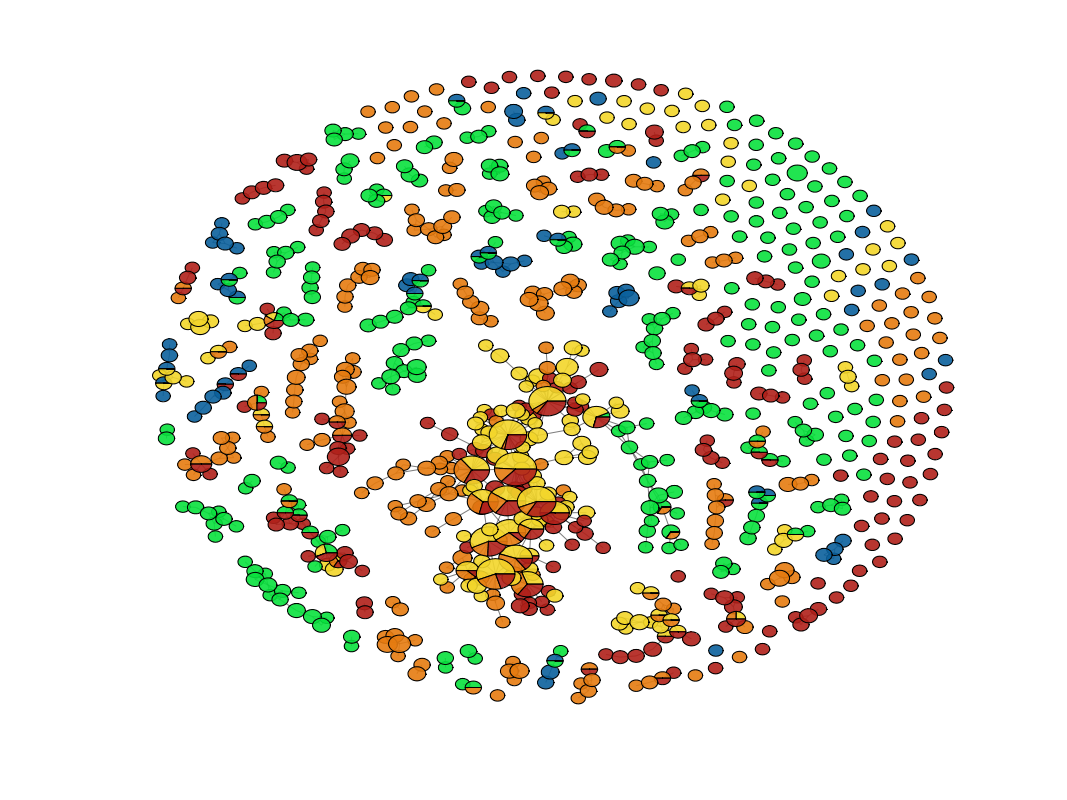

In [2]:
imgpath = 'results/cme/mappers_cme_fig4d.json/SBJ07/BDLMapper_12_30_30/plot_task-CME.png'
display(IPyImage(filename=os.path.join('../', imgpath)))

### Figure 4b

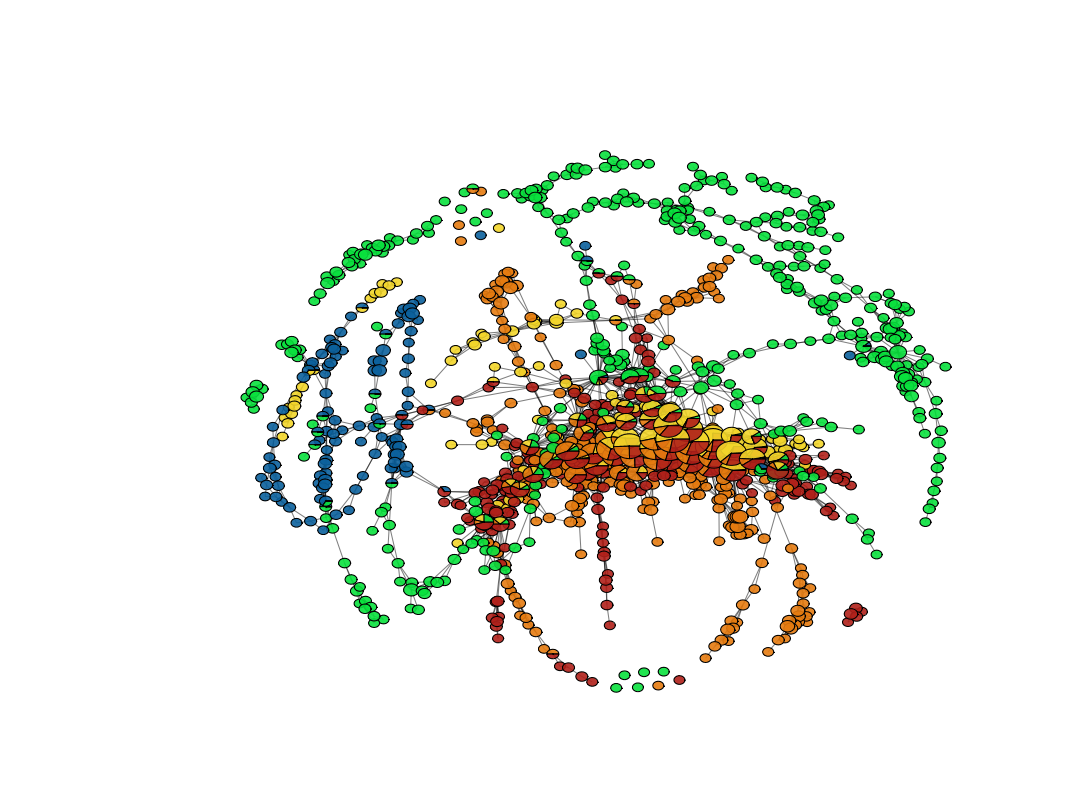

In [3]:
imgpath = 'results/cme/mappers_cme_fig4d.json/SBJ07/BDLMapper_12_30_60/plot_task-CME.png'
display(IPyImage(filename=os.path.join('../', imgpath)))

### Figure 4c

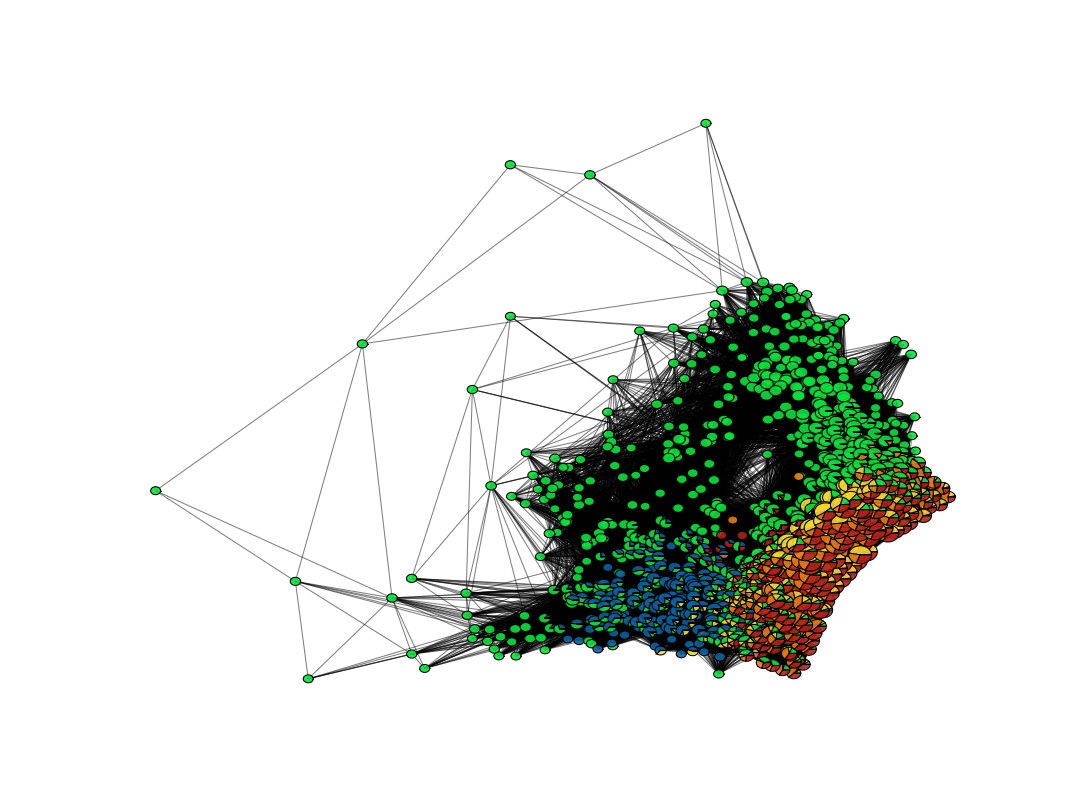

In [4]:
imgpath = 'results/cme/mappers_cme_fig4d.json/SBJ07/BDLMapper_12_30_90/plot_task-CME.png'
display(IPyImage(filename=os.path.join('../', imgpath)))

### Figure 4d

Run the following code to generate the figure 4d from the following MATLAB code

```
FN_TIMING="$WORKSPACE/demapper/data/cme/timing.csv"
RES_DIR="$WORKSPACE/demapper/results/cme/analysis/${CONF}/"
CHANGE_POINTS=10
TIMECHANGES="[0, 1, 2, 4, 6, 7, 8, 10]";

ARGS="fn_timing='$FN_TIMING'; res_path='${RES_DIR}'; mapper_name='BDLMapper_12_30_60'; p_chgs=$TIMECHANGES; CHANGE_POINTS=${CHANGE_POINTS};"
matlab -nodesktop -r "${ARGS} run('$WORKSPACE/demapper/code/cme/plots_for_fig4.m')"
```

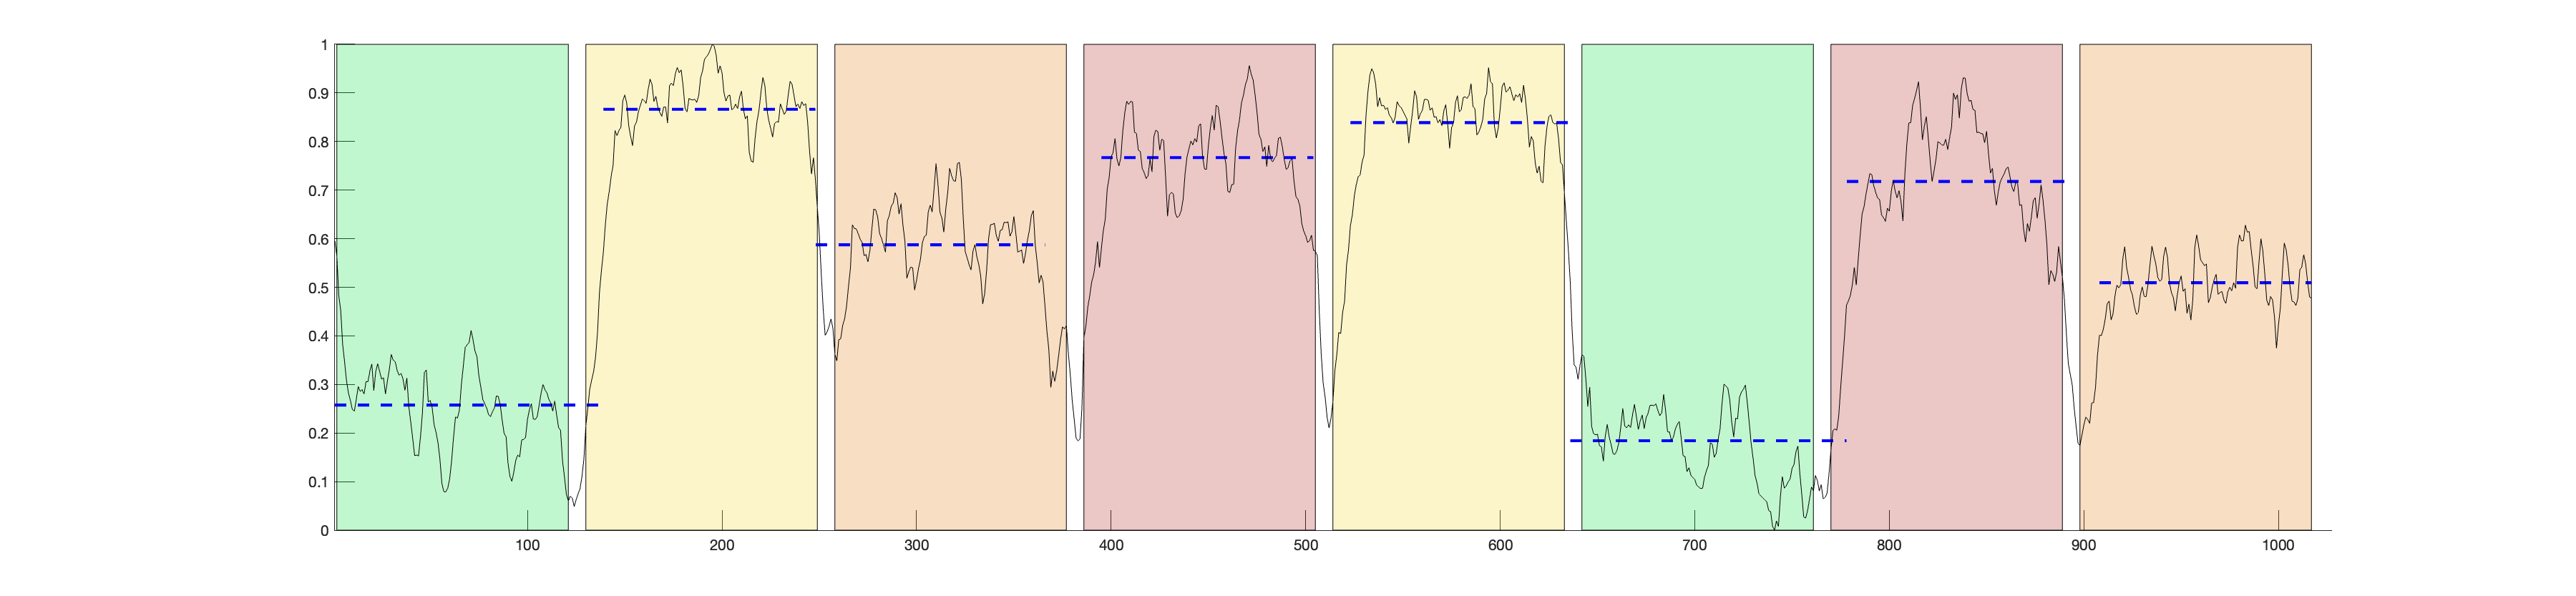

In [5]:
imgpath = 'results/cme/analysis/mappers_cme_fig4d.json/change-degs_BDLMapper_12_30_60.png'
display(IPyImage(filename=os.path.join('../', imgpath)))

### Figure 4e

In [6]:
PICKED_DATASET = 'cmefig4e'
TYPE='compute_degrees_from_TCM'

datadir = DATASETS[PICKED_DATASET]
stats_path = os.path.join(datadir, 'compute_stats-averaged.csv')
results_path = os.path.join(datadir, '{0}/combined-{0}.csv'.format(TYPE))

filter_by = FILTERS[PICKED_DATASET][0]
df, max_values = extract_dataset(stats_path, results_path, filter_by, extract_params_f, has_sbj=False)

resdir = datadir
if len(FILTERS[PICKED_DATASET]) > 1:
    resdir = os.path.join(datadir, filter_by)
    os.makedirs(resdir, exist_ok=True)

print(max_values)
df.sample(5)

len(stats):  640
len(results):  640
{}


,Mapper,K,R,G,ChangePointsIndicesError,ChangePointsCount,assortativity-mean,assortativity-std,coverage_TRs-mean,coverage_TRs-std,...,degree_TRs_avg-mean,degree_TRs_avg-std,degree_TRs_entropy-mean,degree_TRs_entropy-std,distances_entropy-mean,distances_entropy-std,distances_max-mean,distances_max-std,hrfdur_stat-mean,hrfdur_stat-std
450,BDLMapper_64_10_40,64,10,40,5.142857,10.0,-0.237717,0.062146,0.963127,0.016674,...,34.659394,8.136667,5.426930,0.427669,3.173329,0.121248,14.611111,1.819466,0.139543,0.050198
45,BDLMapper_12_35_70,12,35,70,3.142857,10.0,0.047662,0.118589,0.990713,0.006445,...,444.229389,58.150030,8.049496,0.351868,3.733864,0.364238,25.222222,5.012403,0.188452,0.043696
384,BDLMapper_4_10_20,4,10,20,18.857143,10.0,0.373628,0.171543,0.999836,0.000377,...,7.670763,1.678558,3.532483,0.343236,3.481166,0.115068,13.222222,1.592466,0.707112,0.125546
596,BDLMapper_8_20_60,8,20,60,3.285714,10.0,0.055525,0.057956,0.993062,0.013756,...,144.607000,12.189008,6.765493,0.343190,3.602954,0.309692,20.666667,4.665266,0.220132,0.056910
525,BDLMapper_6_15_70,6,15,70,17.714286,10.0,0.154239,0.096687,1.000000,0.000000,...,433.310056,44.811310,6.807904,0.358526,2.527392,0.240676,8.444444,1.199128,0.502412,0.064666


In [7]:
TR = 1.5
target_metrics = {
    'coverage_nodes-mean': [0.7, 1.0],
    'hrfdur_stat-mean': [0.15, 1.0],
    'distances_entropy-mean': [2.0, 10000.0]
}
displayed_target_param = 'ChangePointsIndicesError'

In [8]:
fullname = {
    'R': 'Resolution',
    'G': 'Gain'
}

def add_heatmaps(combs, fixedVals):
    assert len(fixedVals) == len(combs)
    added = np.zeros_like(combs[0].to_numpy())
    for k,fV in enumerate(fixedVals):
        M = combs[k].to_numpy() * 1
        added = added + M
    return added

def plot_merger(df, sbj_group_name, sbj_group, fixedV, fixedVals, indexV, colV,
                target_metrics, displayed_target_param, resdir,
                TR=None, heatmap_vmin=None, heatmap_vmax=None):
    df, fixedV = _handle_list_cols(df, fixedV)
    df, indexV = _handle_list_cols(df, indexV)
    df, colV = _handle_list_cols(df, colV)

    newtypes = {}
    allcols = []
    for col in [fixedV, indexV, colV]:
        col = col if type(col) == list else [col]
        allcols.extend(col)
        for c in col:
            if c in ['K', 'G', 'R', 'linkbins']:
                newtypes[c] = 'int'

    if len(sbj_group):
        df_filter = df['SBJ'] == sbj_group[0]
        for idx in range(1,len(sbj_group)):
            df_filter = df_filter | (df['SBJ'] == sbj_group[idx])
    else:
        df_filter = df['G'] > 0

    dff = df[df_filter]
    dff = dff.groupby(['Mapper'] + allcols).mean()
    dff = dff.reset_index().astype(newtypes)

    # Create combs
    combs = []
    combs_target = []
    for K in fixedVals:
        comb_isset = False
        df_comb = None
        for target, lims in target_metrics.items():
            df_p = dff[dff[fixedV] == K].pivot(index=indexV, columns=colV, values=target)
            df_wl = (df_p >= lims[0]) & (df_p <= lims[1]) # within limits
            if not comb_isset:
                df_comb = df_wl
                comb_isset = True
            else:
                df_comb = df_comb & df_wl
        combs.append(df_comb)

        target_df_p = dff[dff[fixedV] == K].pivot(index=indexV, columns=colV, values=displayed_target_param)
        combs_target.append(target_df_p * df_comb)

    iV = combs[0].index.to_list()
    cV = combs[0].columns.to_list()

    added = add_heatmaps(combs, fixedVals)
    added_target = add_heatmaps(combs_target, fixedVals)

    M = np.divide(np.multiply(added_target, added > 0), added, where=added > 0)
    if TR:
        M = M * TR
    M[added == 0] = np.NaN


    extra_args = {}
    if heatmap_vmin is not None:
        extra_args['vmin'] = heatmap_vmin
    if heatmap_vmax is not None:
        extra_args['vmax'] = heatmap_vmax
    ax = sns.heatmap(np.flip(M, 0), xticklabels=cV, yticklabels=iV[::-1], cmap='magma_r', **extra_args)
    ax.set_ylabel(fullname[indexV])
    ax.set_xlabel(fullname[colV])
    ax.set_facecolor('white')
    plt.tight_layout()
    # plt.show()
    plt.savefig(
        os.path.join(
            resdir,
            'plot_merger{}{}_K={}_{}.png'.format(
                indexV,
                colV,
                ','.join([str(k) for k in fixedVals]),
                sbj_group_name)),
        dpi=150)
    plt.close()


In [9]:
sbj_group = []
indexV, colV = 'R', 'G'
fixedV = 'K'
all_fixed_vals = sorted(df[fixedV].drop_duplicates().tolist())

plot_merger(df, '', [], 'K', all_fixed_vals, 'R', 'G', target_metrics, displayed_target_param, resdir, TR)

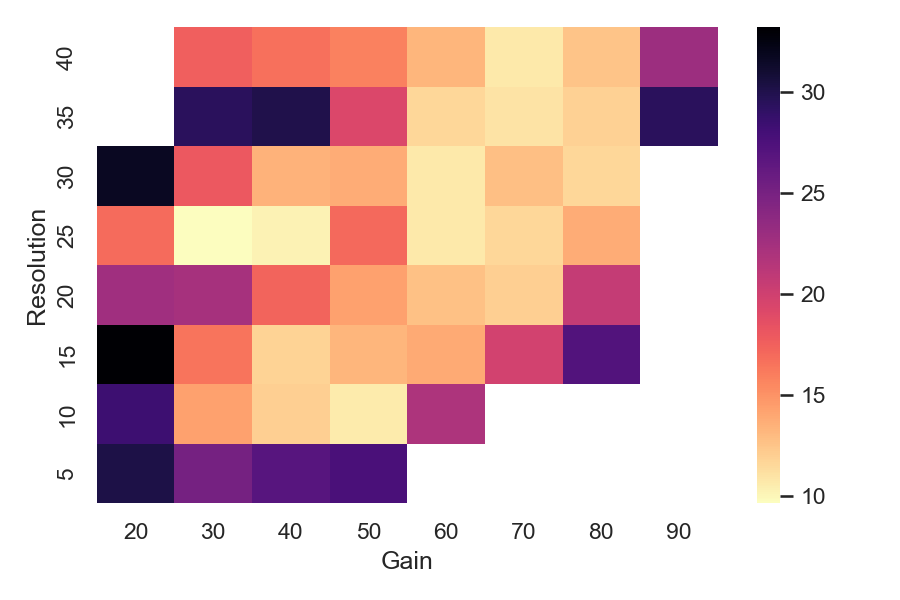

In [10]:
imgpath = 'results/cme/analysis/mappers_cme_fig4e.json/plot_mergerRG_K=4,6,8,12,16,24,32,36,48,64_.png'
display(IPyImage(filename=os.path.join('../', imgpath)))

## Supplementary figures

In [11]:

mapper_config = 'mappers_cme_fig4d.json'

basepath = os.path.abspath('.').split('demapper')[0]
main_path = '{}/demapper/results/cme/{}/'.format(basepath, mapper_config)
res_path = '{}/demapper/results/cme/analysis/{}/'.format(basepath, mapper_config)

fname = 'plot_task-CME.png'
sbjs = sorted([s for s in os.listdir(main_path) if s.startswith('SBJ')])
mappers = sorted([[m] + [int(k) for k in m.split('_')[1:]]
                  for m in os.listdir(os.path.join(main_path, sbjs[0]))
                  if 'Mapper' in m])

df = pd.DataFrame(data=mappers, columns=['mapper', 'K', 'R', 'G'])

In [12]:
for sbj in tqdm(sbjs):
    RVals = df['R'].drop_duplicates()[::-1]
    GVals = df['G'].drop_duplicates()
    plot_grid_params(df, sbj, fname, 'G', GVals, 'R', RVals, main_path, res_path)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [00:22<00:00,  1.24s/it]
